**1) Importing Libraries**

In [1]:
import torch  # PyTorch library for building deep learning models
import torch.nn as nn  # Module to define neural networks
import torch.optim as optim  # Optimizers for training the model
import numpy as np  # Library for numerical operations
import pandas as pd  # Library for handling datasets
import matplotlib.pyplot as plt  # Library for data visualization
from sklearn.datasets import fetch_california_housing  # Dataset for housing prices
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
from sklearn.preprocessing import StandardScaler  # Standardization of dataset

**2) Loading the dataset**

California Housing dataset is used, which contains various housing features and corresponding house prices. The dataset is loaded from sklearn.


In [2]:
data = fetch_california_housing()
X, y = data.data, data.target

In [3]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [4]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

**3) Preprocessing the Data**

Normalizing the features using StandardScaler
Transformingg X to have mean 0 and variance 1 for good model performance.

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Splitting the dataset into training and testing sets. (80% training, 20% testing)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4) Converting Data to PyTorch Tensors**

PyTorch models take the input data in tensor format.

Converting NumPy arrays to PyTorch tensors for model training.

In [7]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshape target to column vector
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

**5) Building the Regression Model**

A simple feedforward neural network with three layers:          
-> Input layer with 64 neurons.                
-> Hidden layer with 32 neurons.        
-> Output layer with 1 neuron (since this is a regression task).        
-> ReLU activation function is used for non-linearity.

In [8]:
class HousePriceModel(nn.Module):
    def __init__(self, input_dim):
        super(HousePriceModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)  # First layer with 64 neurons
        self.fc2 = nn.Linear(64, 32)  # Second layer with 32 neurons
        self.fc3 = nn.Linear(32, 1)  # Output layer with 1 neuron (regression task)
        self.relu = nn.ReLU()  # ReLU activation function for non-linearity

    def forward(self, x):
        x = self.relu(self.fc1(x))  # Pass through first layer and apply ReLU
        x = self.relu(self.fc2(x))  # Pass through second layer and apply ReLU
        x = self.fc3(x)  # Output layer (no activation for regression)
        return x


Initializing the model with input features

In [9]:
model = HousePriceModel(X_train.shape[1])

**6) Defining Loss Function and Optimizer**

For regression we use Mean Squares Error(MSE)

In [10]:
criterion = nn.MSELoss()

In [12]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

**7) Training the Model**

Training the model for 100 epochs, using the following steps:         
-> Set the model to training mode.         
-> Compute predictions.      
-> Calculate loss.      
-> Perform backpropagation.       
-> Update weights using the optimizer.  
-> Printing loss every 10 epochs.

In [13]:
losses = []  # Store loss values for visualization
epochs = 100
for epoch in range(epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Reset gradients to zero before backpropagation
    predictions = model(X_train_tensor)  # Get model predictions for training data
    loss = criterion(predictions, y_train_tensor)  # Compute loss
    loss.backward()  # Perform backpropagation to compute gradients
    optimizer.step()  # Update model parameters
    losses.append(loss.item())  # Store loss value

    if (epoch+1) % 10 == 0:  # Print loss every 10 epochs
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 1.5534
Epoch [20/100], Loss: 0.7549
Epoch [30/100], Loss: 0.5844
Epoch [40/100], Loss: 0.4981
Epoch [50/100], Loss: 0.4387
Epoch [60/100], Loss: 0.4120
Epoch [70/100], Loss: 0.3979
Epoch [80/100], Loss: 0.3869
Epoch [90/100], Loss: 0.3787
Epoch [100/100], Loss: 0.3716


Plotting the training loss curve

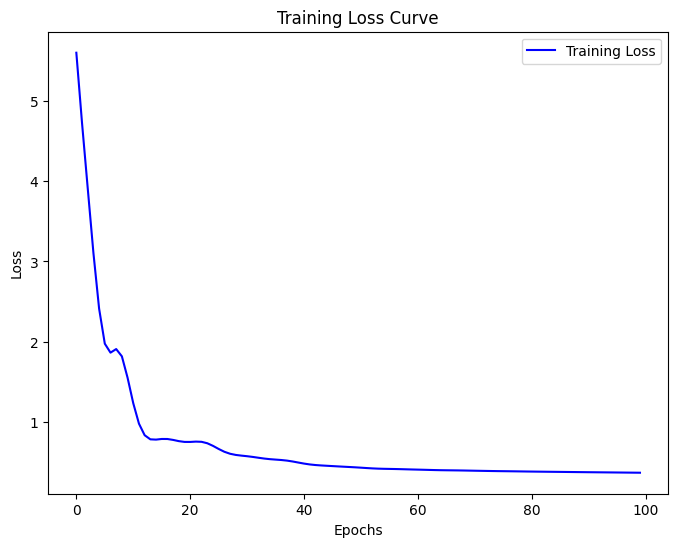

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), losses, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

**8) Model Evaluation**

In [15]:
model.eval()  # Set model to evaluation mode
with torch.no_grad():  # No gradient calculation during evaluation
    y_pred = model(X_test_tensor)  # Get predictions on test data
    test_loss = criterion(y_pred, y_test_tensor).item()  # Compute test loss
    print(f'Test Loss: {test_loss:.4f}')

Test Loss: 0.3845


Visualizing Predictions using ScatterPlot

In [16]:
y_pred_numpy = y_pred.numpy().flatten()
y_test_numpy = y_test_tensor.numpy().flatten()

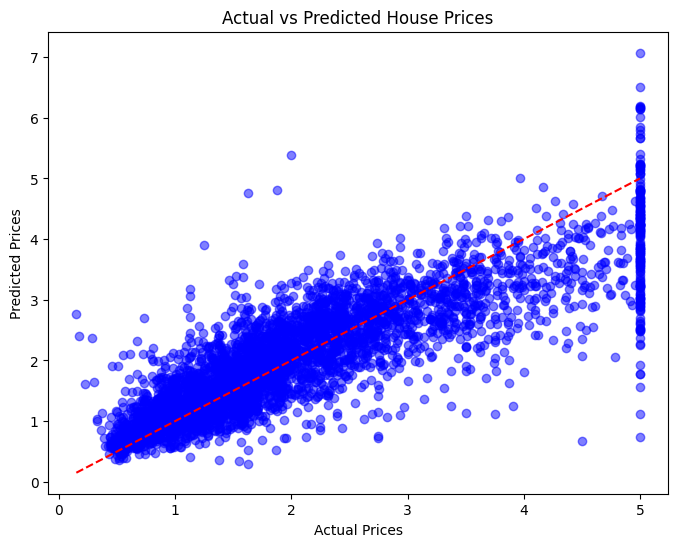

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_numpy, y_pred_numpy, alpha=0.5, color='blue')
plt.plot([y_test_numpy.min(), y_test_numpy.max()], [y_test_numpy.min(), y_test_numpy.max()], '--', color='red')  # Reference line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# **Bonus Challenges**

**1) Trying Different Numbers of Layers and Neurons**

A deeper neural network with more hidden layers and neurons can potentially improve performance. Let's modify the architecture by:

Increasing the number of layers from 3 to 4.
Changing neuron sizes in each layer (128 → 64 → 32 → 1 instead of 64 → 32 → 1).

In [20]:
class HousePriceModelV2(nn.Module):
    def __init__(self, input_dim):
        super(HousePriceModelV2, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # Increased neurons
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)  # Extra layer
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize new model
model_v2 = HousePriceModelV2(X_train.shape[1])


**2) Experimenting with Different Activation Functions**

-> LeakyReLU (fixes the dying ReLU issue).     
-> Tanh (helps with values close to zero).       
-> ELU (exponential linear unit, useful for fast convergence).

In [21]:
class HousePriceModelV3(nn.Module):
    def __init__(self, input_dim):
        super(HousePriceModelV3, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

        self.leaky_relu = nn.LeakyReLU(0.01)  # Using LeakyReLU instead of ReLU
        self.tanh = nn.Tanh()  # Alternative activation function

    def forward(self, x):
        x = self.leaky_relu(self.fc1(x))  # LeakyReLU activation
        x = self.tanh(self.fc2(x))  # Tanh activation
        x = self.fc3(x)  # No activation in output layer for regression
        return x

# Initialize new model
model_v3 = HousePriceModelV3(X_train.shape[1])


**3) Tuning Learning Rates and Batch Sizes**

Changing learning rates and batch sizes can impact training speed and stability.
Outcomes:              
-> A high learning rate (0.1) may lead to instability, while a low learning rate (0.001) makes convergence slow.         
-> A small batch size (16) captures finer details but can be noisy. Larger batches (64) provide smoother updates but need more memory.

In [23]:
# Experimenting with different learning rates and batch sizes
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]

for lr in learning_rates:
    for batch_size in batch_sizes:
        model = HousePriceModel(X_train.shape[1])  # Initialize model
        optimizer = optim.Adam(model.parameters(), lr=lr)  # Change learning rate

        # Convert data to DataLoader for batching
        train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

        # Train model with different batch sizes
        for epoch in range(50):
            for X_batch, y_batch in train_loader:
                optimizer.zero_grad()
                y_pred = model(X_batch)
                loss = criterion(y_pred, y_batch)
                loss.backward()
                optimizer.step()

        print(f"LR: {lr}, Batch Size: {batch_size}, Final Loss: {loss.item():.4f}")


LR: 0.001, Batch Size: 16, Final Loss: 0.2459
LR: 0.001, Batch Size: 32, Final Loss: 0.1336
LR: 0.001, Batch Size: 64, Final Loss: 0.2165
LR: 0.01, Batch Size: 16, Final Loss: 1.0167
LR: 0.01, Batch Size: 32, Final Loss: 0.1568
LR: 0.01, Batch Size: 64, Final Loss: 0.1798
LR: 0.1, Batch Size: 16, Final Loss: 2.7610
LR: 0.1, Batch Size: 32, Final Loss: 1.2584
LR: 0.1, Batch Size: 64, Final Loss: 1.2481


**4) Visualizing Loss Reduction Over Epochs**

Plot of how the loss decreases over training epochs to see model convergence.   
-> If loss fluctuates a lot, learning rate may be too high.                 
-> If loss doesn't decrease, learning rate may be too low.

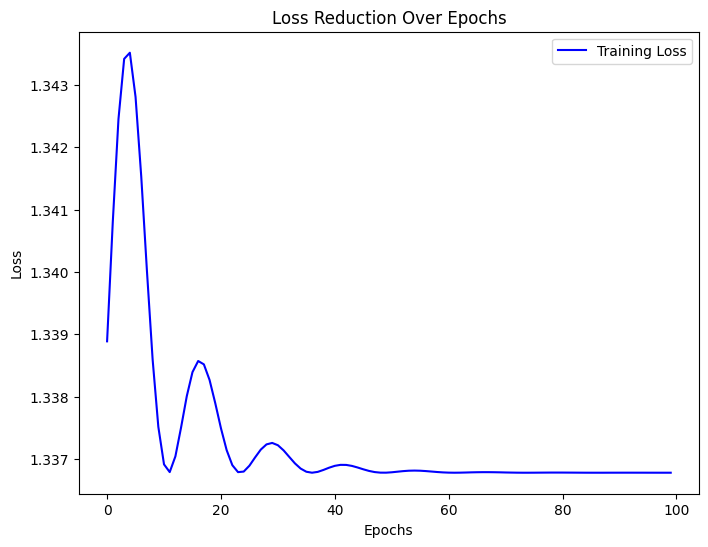

In [24]:
# Train model and store loss over epochs
losses = []
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())  # Store loss for visualization

# Plot training loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), losses, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Reduction Over Epochs')
plt.legend()
plt.show()
